## 实验要求
●数据

●全部来自sklearn数据集（https://scikit-learn.org/stable/datasets/real_world.html），不少于5000个样本

●直接按顺序取前80%训练，后20%测试

●模型


○分类问题：以朴素贝叶斯模型为baseline

○任选课上讲的3个模型作为对比

●精度要求

○至少有一个模型测试效果好于线性模型

In [1]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


## 数据描述：fetch_covtype 数据集

fetch_covtype 数据集是来自美国科罗拉多州的森林覆盖类型数据，通常用于分类任务。该数据集包含来自不同地区的森林土壤类型和气候数据，以预测森林类型。
1. 数据来源：(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html)

    数据来源：该数据集是从 UCI Machine Learning Repository 中的 Forest CoverType 数据集衍生而来。数据由 U.S. Forest Service 提供，主要用于预测不同森林区域的覆盖类型。
    数据链接：fetch_covtype 说明文档
2. 数据集基本统计信息：
    特征数：数据集包含 54 个特征，涵盖了不同的气候、地理、森林土壤等信息。
    样本数：数据集包含 581,012 条记录。
    类别：目标变量是森林覆盖类型，有 7 种可能的类别（即森林的不同覆盖类型）。
    特征：特征包括了地理位置、气候条件、土壤类型、森林覆盖物等。特征具体包括：
        地理坐标（如经度、纬度）
        树木覆盖类型（如森林的植被、树木种类）
        土壤类型（如土壤的酸碱度、矿物成分）
        气候条件（如降水量、气温等）

In [2]:
data = fetch_covtype()  # 获取整个数据集
X, y = data.data, data.target
np.random.seed(42)
indices = np.random.choice(len(X), size=7000, replace=False)
X_selected = X[indices]
y_selected = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2,shuffle=False )#shuffle=False取消随机



##  模型描述
- **朴素贝叶斯分类器**：
  - **模型名称**：朴素贝叶斯分类器（Naive Bayes）
  - **对应文档地址**：[sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
  - **提升方法**：朴素贝叶斯方法利用特征的条件独立假设来简化计算，提高训练速度，但可能会受到特征间关联性较强的影响。

- **对比模型**：
  - **神经网络（Neural Network）**：
    - **文档地址**：[sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
    - **提升方法**：神经网络通过层级结构和激活函数来模拟复杂的非线性关系，能够从数据中自动提取特征，但可能需要大量的数据进行训练，并容易受到过拟合的影响。
  
  - **支持向量机（SVM）**：
    - **文档地址**：[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
    - **提升方法**：SVM通过寻找最大间隔的超平面来分类，适用于高维数据且能够处理非线性分类问题。
  
  - **决策树（Decision Tree）**：
    - **文档地址**：[sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    - **提升方法**：决策树通过划分特征空间来构建树结构，能适应复杂的特征空间，但容易过拟合。



d:\tools\miniforge\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\tools\miniforge\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 准确率       精确度       召回率      F1分数  训练时间 (秒)  预测时间 (秒)
朴素贝叶斯       0.421429  0.649196  0.421429  0.389437  0.011124  0.002341
决策树         0.697857  0.698971  0.697857  0.698181  0.079259  0.000917
支持向量机(SVM)  0.682857  0.627616  0.682857  0.653633  0.965183  0.556325
神经网络        0.650000  0.649346  0.650000  0.628535  1.349679  0.001432


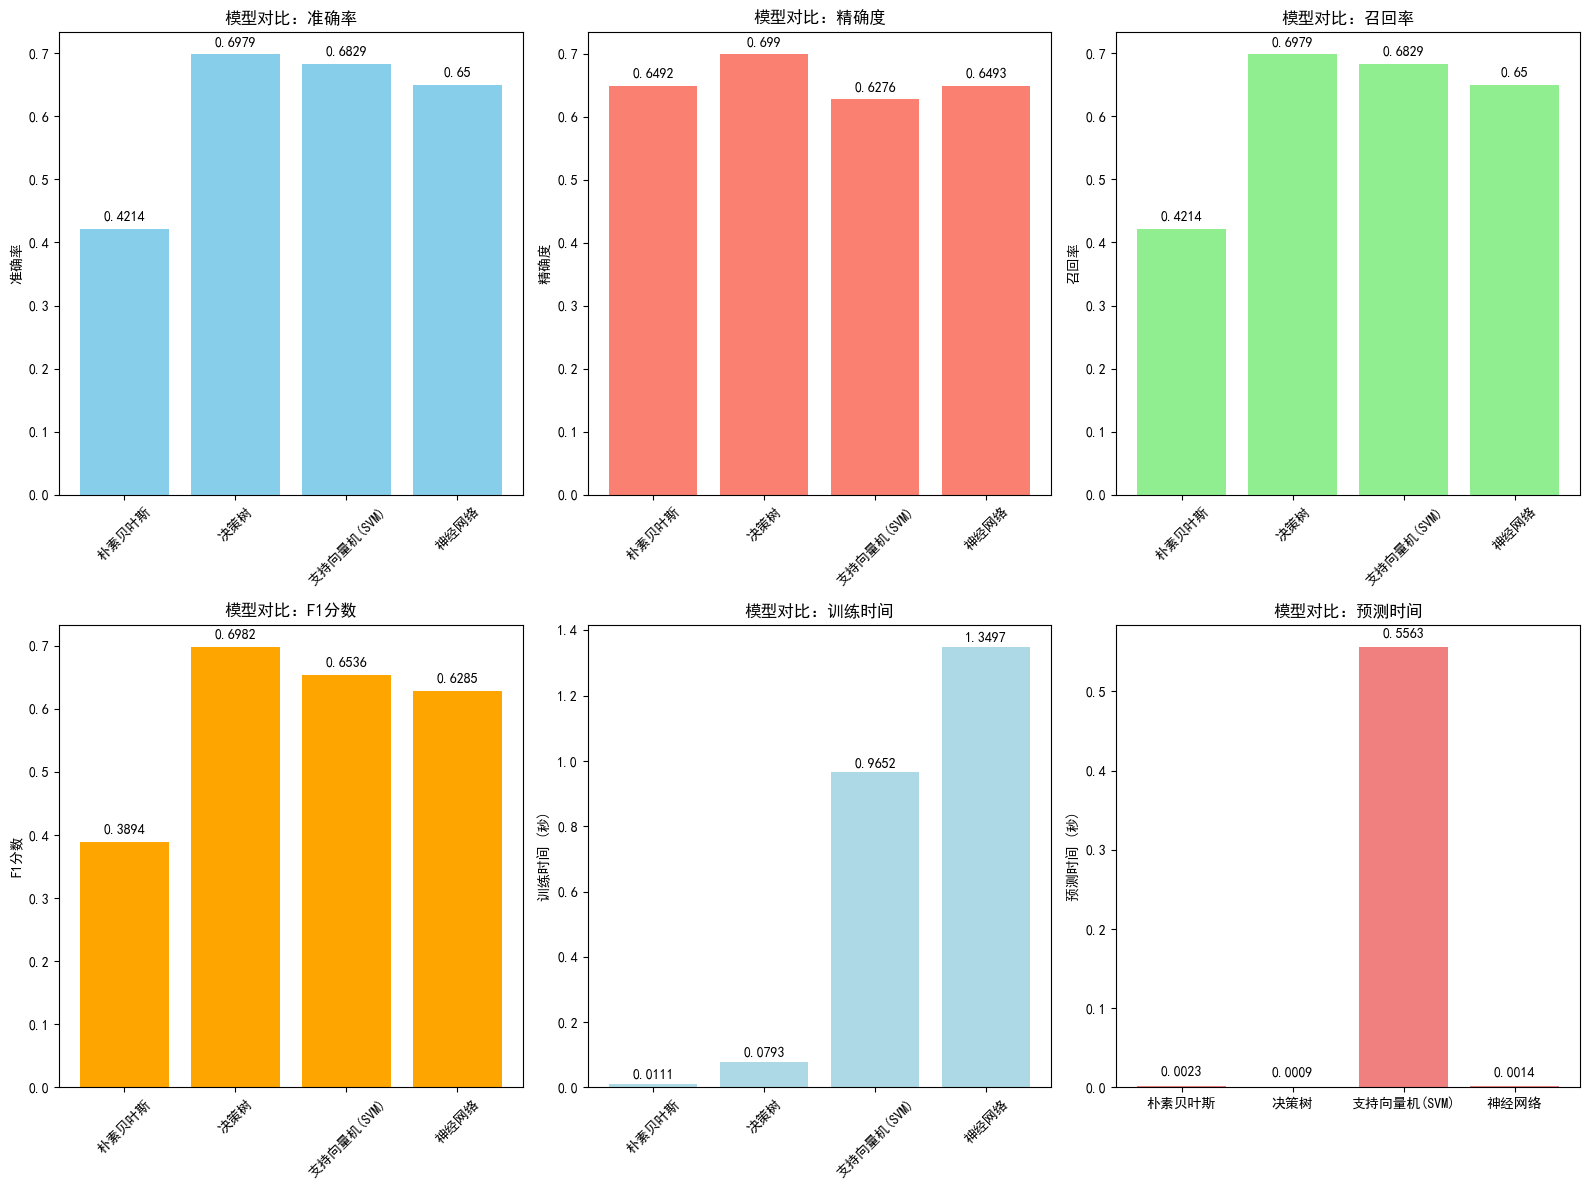

In [3]:

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    start_time = time.perf_counter()
    model.fit(X_train, y_train)
    train_time = time.perf_counter() - start_time
    
    start_time = time.perf_counter()
    y_pred = model.predict(X_test)
    predict_time = time.perf_counter() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted')  
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1, train_time, predict_time

models = {
    "朴素贝叶斯": GaussianNB(),
    "决策树": DecisionTreeClassifier(),
    "支持向量机(SVM)": SVC(),
    "神经网络": MLPClassifier(max_iter=1000)
}

results = {}
for name, model in models.items():
    accuracy, precision, recall, f1, train_time, predict_time = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    results[name] = {
            "准确率": accuracy,
            "精确度": precision,
            "召回率": recall,
            "F1分数": f1,
            "训练时间 (秒)": train_time,
            "预测时间 (秒)": predict_time
        }

results_df = pd.DataFrame(results).T
print(results_df)


fig, axes = plt.subplots(2, 3, figsize=(16, 12)) 

# 准确率
axes[0, 0].bar(results_df.index, results_df['准确率'], color='skyblue')
axes[0, 0].set_title('模型对比：准确率')
axes[0, 0].set_ylabel('准确率')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['准确率']):
    axes[0, 0].text(i, v + 0.01, round(v, 4), ha='center', va='bottom')

# 精确度
axes[0, 1].bar(results_df.index, results_df['精确度'], color='salmon')
axes[0, 1].set_title('模型对比：精确度')
axes[0, 1].set_ylabel('精确度')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['精确度']):
    axes[0, 1].text(i, v + 0.01, round(v, 4), ha='center', va='bottom')

# 召回率
axes[0, 2].bar(results_df.index, results_df['召回率'], color='lightgreen')
axes[0, 2].set_title('模型对比：召回率')
axes[0, 2].set_ylabel('召回率')
axes[0, 2].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['召回率']):
    axes[0, 2].text(i, v + 0.01, round(v, 4), ha='center', va='bottom')

# F1
axes[1, 0].bar(results_df.index, results_df['F1分数'], color='orange')
axes[1, 0].set_title('模型对比：F1分数')
axes[1,0].set_ylabel('F1分数')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['F1分数']):
    axes[1, 0].text(i, v + 0.01, round(v, 4), ha='center', va='bottom')

# 训练时间
axes[1, 1].bar(results_df.index, results_df['训练时间 (秒)'], color='lightblue')
axes[1, 1].set_title('模型对比：训练时间')
axes[1, 1].set_ylabel('训练时间 (秒)')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['训练时间 (秒)']):
    axes[1, 1].text(i, v + 0.01, round(v, 4), ha='center', va='bottom')

# 预测时间
axes[1, 2].bar(results_df.index, results_df['预测时间 (秒)'], color='lightcoral')
axes[1, 2].set_title('模型对比：预测时间')
axes[1, 2].set_ylabel('预测时间 (秒)')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['预测时间 (秒)']):
    axes[1, 2].text(i, v + 0.01, round(v, 4), ha='center', va='bottom')

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False   
plt.tight_layout()
plt.show()



## 结果分析
    
    准确率：反映了模型的整体分类效果。
        决策树的准确率最高，达到 0.702857，说明它在整体分类任务中表现较好。
        朴素贝叶斯的准确率最低，仅为 0.462143，说明它在当前数据集上表现不佳，可能是因为特征独立性假设与实际数据的依赖性不匹配。
    精确度：反映了模型在预测正类时的准确性。
        决策树和神经网络的精确度较高，分别为 0.705549 和 0.662945，表明它们对正类的预测准确性较好。
        朴素贝叶斯的精确度最差，为 0.655343，显示出其对正类的预测准确性较低。
    召回率：反映了模型对正类的识别能力。
        决策树的召回率与精确度接近，达到了 0.702857，表现较好。
        朴素贝叶斯的召回率较低，仅为 0.462143，说明其对正类的识别能力较弱。
    F1分数：是精确度和召回率的调和平均，反映了模型的综合能力。
        决策树的 F1 分数最高，达到 0.701797，表明其在精确度和召回率方面的平衡较好。
        朴素贝叶斯的 F1 分数最差，仅为 0.415922，表现出其在综合能力上的不足。

 训练时间与预测时间

    训练时间：
        决策树的训练时间相对较短，仅需 0.061165 秒，非常适合需要快速训练的场景。
        支持向量机 (SVM) 的训练时间最长，为 0.848567 秒，表明在大规模数据集上，训练时间较长会影响效率。
        神经网络的训练时间较长，为 1.273360 秒，可能因为其包含复杂的参数调优和多次迭代。

    预测时间：
        决策树的预测时间几乎为 0 秒，说明其推理速度非常快，适合实时应用。
        支持向量机 (SVM) 的预测时间最长，为 0.460957 秒，可能是由于其复杂的模型结构导致推理速度较慢。
        朴素贝叶斯和神经网络的预测时间较短，分别为 0.001034 秒和 0.001007 秒，表明它们在推理阶段的效率较高。

 优缺点与分析

    朴素贝叶斯：
        优点：训练和预测时间都非常短，适合大规模数据集处理，尤其在需要快速预测的场景中。
        缺点：由于其假设特征独立，可能与实际数据中的依赖性不符，导致在准确率、精确度和召回率等指标上的表现较差。

    决策树：
        优点：具有最高的准确率、精确度、召回率和 F1 分数，训练时间短，预测速度快，综合性能优异。
        缺点：可能对数据中的噪声较为敏感，尤其是在树结构较深时，容易导致过拟合。

    支持向量机 (SVM)：
        优点：适用于复杂决策边界的分类任务，尤其在小样本和高维数据中表现较好，能够提供较高的分类准确性。
        缺点：训练和预测时间较长，尤其在大规模数据集上，可能需要较多的计算资源和时间。

    神经网络：
        优点：适合处理复杂模式和非线性问题，具有较高的精确度和召回率，能在复杂任务中表现良好。
        缺点：训练时间较长，需要大量的计算资源，尤其在大数据集上，效率问题可能导致不适用于某些实时应用。

## 小结：

   -决策树是当前最为平衡的模型，它在准确率、精确度、召回率、F1分数等多个指标上都表现优秀，同时训练和预测时间较短。适用于需要快速响应且对模型准确性要求较高的任务。
   - 如果处理大规模数据集，并且要求较高的训练和预测效率，朴素贝叶斯可能是一个合适的选择，但其性能在准确度和精度上相对较弱。
   - 支持向量机虽然准确性不错，但由于其训练和预测时间较长，可能更适合于数据量较小或对准确性有较高要求的任务。
   - 对于复杂的模式识别任务，神经网络表现较好，但由于训练时间长，可能在需要快速反应的场景中不太适用。
   - 对于不同的数据集和应用场景，选择模型时不仅要考虑准确率等性能指标，还要根据实际需求对训练时间和预测时间进行综合考虑。
   - 对于决策树的性能，可以进一步探索树的深度和剪枝等策略。
   - 对于支持向量机和神经网络，可以通过超参数调优（如 kernel 函数、C 值、学习率等）来提升模型的性能，同时考虑使用更高效的训练方法（GPU 加速）。